# Montecarlo Scenarios

## Imports

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import montecarlo as mc

## Scenario 1

In [20]:
#1
fair_coin = mc.Die(np.array(['H', 'T']))

unfair_coin = mc.Die(np.array(['H', 'T']))
unfair_coin.change_weight('T', 5.0)

In [21]:
#2
game1 = mc.Game([fair_coin, fair_coin, fair_coin])
game1.play(1000)

In [22]:
#3
game2 = mc.Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)

In [26]:
#4
game1_analyzed = mc.Analyzer(game1)
game2_analyzed = mc.Analyzer(game2)

game1_jackpots = game1_analyzed.jackpot()
game2_jackpots = game2_analyzed.jackpot()

print('Game 1 jackpots: ' + str(game1_jackpots))
print('Game 2 jackpots: ' + str(game2_jackpots))
print('Game 2 came up with jackpots ' + str(round(game2_jackpots/game1_jackpots, 2)) + 'x more frequently than Game 1')

Game 1 jackpots: 243
Game 2 jackpots: 380
Game 2 came up with jackpots 1.56x more frequently than Game 1


In [27]:
#5
rel_freq_1 = game1_jackpots / 1000
rel_freq_2 = game2_jackpots / 1000

print('Game 1 relative frequency: ' + str(rel_freq_1))
print('Game 2 relative frequency: ' + str(rel_freq_2))

Game 1 relative frequency: 0.243
Game 2 relative frequency: 0.38


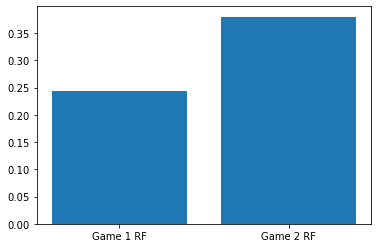

In [42]:
#6
plt.bar(['Game 1 RF', 'Game 2 RF'],[rel_freq_1, rel_freq_2]);

## Scenario 2

In [43]:
#1
fair_die = mc.Die(np.array([1,2,3,4,5,6]))

unfair_type1 = mc.Die(np.array([1,2,3,4,5,6]))
unfair_type1.change_weight(6, 5.0)

unfair_type2 = mc.Die(np.array([1,2,3,4,5,6]))
unfair_type2.change_weight(1, 5.0)

In [45]:
#2
game3 = mc.Game([fair_die, fair_die, fair_die, fair_die, fair_die])
game3.play(10000)

In [46]:
#3
game4 = mc.Game([unfair_type1, unfair_type1, unfair_type2, fair_die, fair_die])
game4.play(10000)

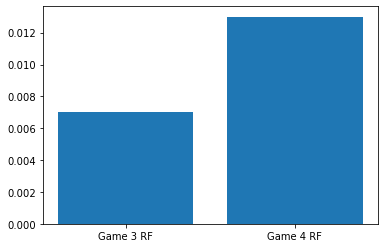

In [47]:
#4
game3_analyzed = mc.Analyzer(game3)
game4_analyzed = mc.Analyzer(game4)

game3_jackpots = game3_analyzed.jackpot()
game4_jackpots = game4_analyzed.jackpot()

rel_freq_3 = game3_jackpots / 1000
rel_freq_4 = game4_jackpots / 1000

plt.bar(['Game 3 RF', 'Game 4 RF'],[rel_freq_3, rel_freq_4]);

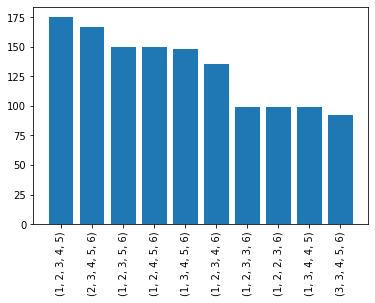

In [83]:
#5
game3_analyzed.combo()
game4_analyzed.combo()

top_combos_game3 = game3_analyzed.combinations.head(10)
top_combos_game4 = game4_analyzed.combinations.head(10)

labels3 = [str(x) for x in top_combos_game3.index]
plt.bar(labels3, top_combos_game3['n']);
plt.xticks(rotation = 'vertical');

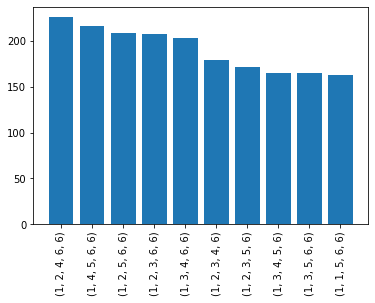

In [84]:
labels4 = [str(x) for x in top_combos_game4.index]
plt.bar(labels4, top_combos_game4['n']);
plt.xticks(rotation = 'vertical');

## Scenario 3

In [72]:
#1
letters = {'A': 8.4966, 'B': 2.0720, 'C': 4.5388, 'D': 3.3844, 'E': 11.1607, 'F': 1.8121, 'G': 2.4705, 'H': 3.0034,
    'I': 7.5448, 'J': 0.1965, 'K': 1.1016, 'L': 5.4893, 'M': 3.0129, 'N': 6.6544, 'O': 7.1635, 'P': 3.1671, 'Q': 0.1962,
    'R': 7.5809, 'S': 5.7351, 'T': 6.9509, 'U': 3.6308, 'V': 1.0074, 'W': 1.2899, 'X': 0.2902, 'Y': 1.7779, 'Z': 0.2722 }

letter_die = mc.Die(np.array(list(letters.keys())))
for i in range(len(letter_die.faces)):
    letter_die.change_weight(list(letters.keys())[i], list(letters.values())[i])

In [73]:
#2
game5 = mc.Game([letter_die, letter_die, letter_die, letter_die, letter_die])
game5.play(1000)

In [86]:
#game5.show()
game5.show().head(10)

die,0,1,2,3,4
roll,,,,,
0,O,E,R,E,S
1,G,O,O,C,I
2,S,E,E,R,E
3,E,F,S,T,U
4,U,D,S,E,I
5,H,A,O,S,U
6,A,E,S,T,R
7,D,T,P,V,L
8,E,L,I,L,W


##### #3
When looking through the combinations of the full table, I only found two rows that resembled English words. One was 'plots' and one was 'taste'

In [87]:
#4

rel_freq_5 = 2/1000
rel_freq_5

0.002